# Exploration of Exact KDE Computation

THe `ks` package provides binned estimates of the KDE which can be computed very quickly using the discrete FFT. However, the package's output has some really strange behavior, as shown in `ks_explorations.ipynb`. Instead of wasting our time trying to get this package to work, we will instead attempt to compute exact estimates of the Gaussian KDE survival functions, and use those in our analyses. The main idea is that using the binned estimates will only muddy the waters even more in our analysis, so we should first see how well the method performs with the exact KDEs to get a sense of how good things could possibly get, and then go back to the binned estimates later on when trying to save on computational time.

However, computing the exact KDE can be extremely computationally expensive. In this notebook, we explore computational time for various parameter selections (projected grid resolution, sample size, etc.) and use this info to choose parameters that will enable feasible computation on Cori so as to not waste too much computing time.

In [6]:
library(dplyr)
library(ggplot2)
library(mvtnorm)
library(MASS)

In [7]:
# function to evaluate the Gaussian KDE at a single grid point
kernSurv <- function(loc, dat, bw)
{
        p1 <- 1 - pnorm(loc[1], mean = dat[,1], sd = bw[1]/4)
        p2 <- 1 - pnorm(loc[2], mean = dat[,2], sd = bw[2]/4)
        return(mean(p1*p2))
}


In [8]:
lb <- 0
ub <- 5
gticks <- 70
n <- 10000
p <- 0.05
beta <- 1/sqrt(n)

In [9]:
dat <- rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4)
bw <- c(bandwidth.nrd(dat[,1]), bandwidth.nrd(dat[,2]))
grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [10]:
start <- proc.time()
surv <- apply(grid, 1, kernSurv, dat=dat, bw=bw)
proc.time() - start

   user  system elapsed 
  7.738   0.060   7.799 

In [144]:
isoline_est <- grid[abs(surv - p) <= beta,]

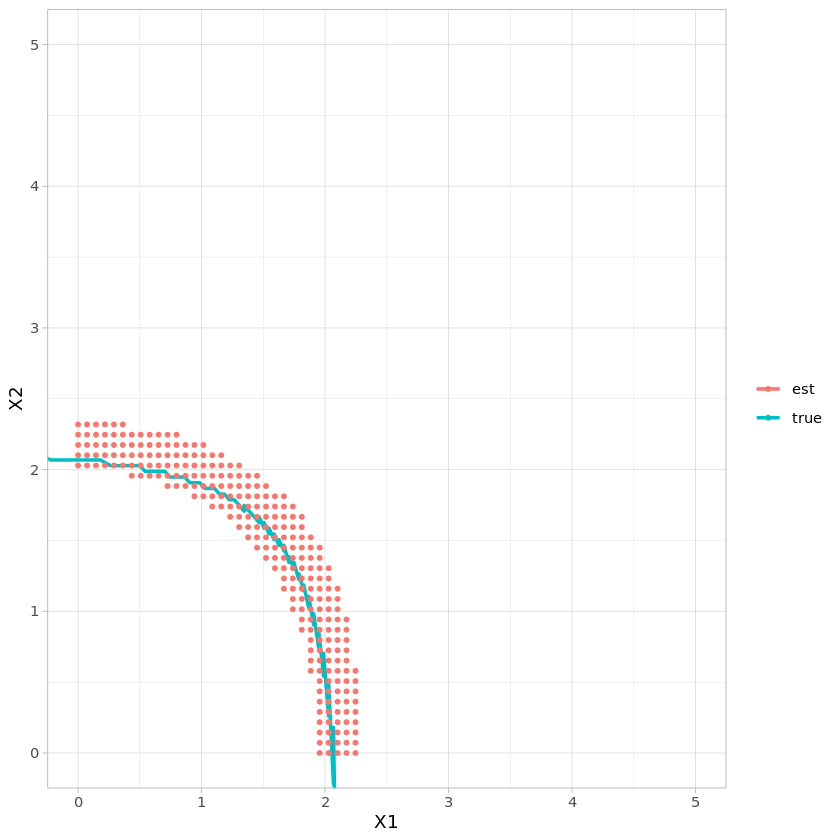

In [145]:
isoline_true <- readRDS(paste0('/global/cscratch1/sd/jbbutler/isolines/bivariate_t/', p, '_bivt.RData'))
plt <- ggplot() + geom_line(data=isoline_true, aes(x=X1, y=X2, col = 'true'), size=1) + coord_cartesian(ylim=c(0, 5), xlim = c(0, 5)) + 
    theme_light() + theme(legend.title = element_blank())
plt + geom_point(data=isoline_est, aes(x=X1, y=X2, col = 'est'), size=1, alpha = 1)



In [161]:
(1.3*100*500)/60/64

[1] 16.92708

In [162]:
surv_lst <- list()

In [163]:
surv_lst$hi <- 5

In [165]:
surv_lst$hi

[1] 5

In [166]:
obj <- readRDS('/global/cscratch1/sd/jbbutler/sims/regions/true_kde_survfuncs/1000n_70gticks_0lb_5ub_bivt/30_1000n_70gticks_0lb_5ub_bivt.RData')